In [1]:
import mysql.connector
from dotenv import load_dotenv
import os
import pandas as pd

In [2]:
load_dotenv()

True

In [3]:
mydb = mysql.connector.connect(
       host = 'chefmatedb.c3i8ggm6665z.ap-south-1.rds.amazonaws.com',
       port = 3306,
       user = 'admin',
       password = os.getenv('dbpassword'))


In [4]:
mycursor=mydb.cursor()

In [5]:
mycursor.execute('create database restaurant')

mydb.commit()

In [6]:
mycursor.execute('show databases')

In [7]:
mycursor.fetchall()

[('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('restaurant',),
 ('sys',)]

In [8]:
import sqlalchemy

In [9]:
server = 'chefmatedb.c3i8ggm6665z.ap-south-1.rds.amazonaws.com'
port = 3306
user = 'admin'
password = os.getenv('dbpassword')
database = 'restaurant'
sqltype = 'mysql+mysqlconnector'

engine = sqlalchemy.create_engine(f'{sqltype}://{user}:{password}@{server}:{port}/{database}')

In [10]:
zomato_df=pd.read_csv('zomato_df.csv')

In [ ]:
zomato_df

,Restaurant ID,Restaurant Name,Location,Cuisine,Ratings,Rating text,Average Cost for Two,Price Range,Table Booking,Online Delivery,Delivering now,Longitude,Latitude,City,Locality
0,308322,Hauz Khas Social,"9-A & 12, Hauz Khas Village, New Delhi","Continental, American, Asian, North Indian",4.3,Very Good,1600,3,1,1,0,77.194471,28.554285,New Delhi,Hauz Khas Village
1,18037817,Qubitos - The Terrace Cafe,"C-7, Vishal Enclave, Opposite Metro Pillar 417...","Thai, European, Mexican, North Indian, Chinese...",4.5,Excellent,1500,3,1,0,0,77.117701,28.647133,New Delhi,Rajouri Garden
2,312345,The Hudson Cafe,"2524, 1st Floor, Hudson Lane, Delhi University...","Cafe, Italian, Continental, Chinese",4.4,Very Good,850,2,0,1,0,77.204317,28.694947,New Delhi,Delhi University-GTB Nagar
3,307490,Summer House Cafe,"1st Floor, DDA Shopping Complex, Aurobindo Pla...","Italian, Continental",4.1,Very Good,1850,3,1,0,0,77.203809,28.552520,New Delhi,Hauz Khas
4,18241537,38 Barracks,"M-38, Outer Circle, Connaught Place, New Delhi","North Indian, Italian, Asian, American",4.4,Very Good,1600,3,1,0,0,77.222858,28.633025,New Delhi,Connaught Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29748,17582627,Senor Iguanas,"961 Hiline Rd, Pocatello, ID 83201",Mexican,3.6,Good,0,1,0,0,0,-112.443300,42.894200,Pocatello,Pocatello
29749,17582625,Sandpiper Restaurant & Lounge,"1400 Bench Rd, Pocatello, ID 83201","American, Seafood, Steak",3.6,Good,40,3,0,0,0,-112.432000,42.901200,Pocatello,Pocatello
29750,17582668,Texas Roadhouse,"560 Bullock Street, Pocatello, ID 83202","American, BBQ, Steak",3.5,Good,45,3,0,0,0,-112.461326,42.910518,Pocatello,Chubbuck
29751,17582498,Riverwalk Cafe,"695 E Main St, Lava Hot Springs, ID 83246","Asian, Thai",3.6,Good,10,1,0,0,0,-112.013200,42.620000,Pocatello,Lava Hot Springs


In [12]:
zomato_df.to_sql('chefmate',con=engine,if_exists='replace')

29753

In [13]:
server = 'chefmatedb.c3i8ggm6665z.ap-south-1.rds.amazonaws.com'
port = 3306
user = 'admin'
password = os.getenv('dbpassword')
database = 'restaurant'
sqltype = 'mysql+mysqlconnector'

engine = sqlalchemy.create_engine(f'{sqltype}://{user}:{password}@{server}:{port}/{database}')

In [14]:
query = 'SELECT * FROM chefmate'

In [15]:
df = pd.read_sql(query, engine)

In [16]:
df

,index,Restaurant ID,Restaurant Name,Location,Cuisine,Ratings,Rating text,Average Cost for Two,Price Range,Table Booking,Online Delivery,Delivering now,Longitude,Latitude,City,Locality
0,0,308322,Hauz Khas Social,"9-A & 12, Hauz Khas Village, New Delhi","Continental, American, Asian, North Indian",4.3,Very Good,1600,3,1,1,0,77.194471,28.554285,New Delhi,Hauz Khas Village
1,1,18037817,Qubitos - The Terrace Cafe,"C-7, Vishal Enclave, Opposite Metro Pillar 417...","Thai, European, Mexican, North Indian, Chinese...",4.5,Excellent,1500,3,1,0,0,77.117701,28.647133,New Delhi,Rajouri Garden
2,2,312345,The Hudson Cafe,"2524, 1st Floor, Hudson Lane, Delhi University...","Cafe, Italian, Continental, Chinese",4.4,Very Good,850,2,0,1,0,77.204317,28.694947,New Delhi,Delhi University-GTB Nagar
3,3,307490,Summer House Cafe,"1st Floor, DDA Shopping Complex, Aurobindo Pla...","Italian, Continental",4.1,Very Good,1850,3,1,0,0,77.203809,28.552520,New Delhi,Hauz Khas
4,4,18241537,38 Barracks,"M-38, Outer Circle, Connaught Place, New Delhi","North Indian, Italian, Asian, American",4.4,Very Good,1600,3,1,0,0,77.222858,28.633025,New Delhi,Connaught Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29748,29748,17582627,Senor Iguanas,"961 Hiline Rd, Pocatello, ID 83201",Mexican,3.6,Good,0,1,0,0,0,-112.443300,42.894200,Pocatello,Pocatello
29749,29749,17582625,Sandpiper Restaurant & Lounge,"1400 Bench Rd, Pocatello, ID 83201","American, Seafood, Steak",3.6,Good,40,3,0,0,0,-112.432000,42.901200,Pocatello,Pocatello
29750,29750,17582668,Texas Roadhouse,"560 Bullock Street, Pocatello, ID 83202","American, BBQ, Steak",3.5,Good,45,3,0,0,0,-112.461326,42.910518,Pocatello,Chubbuck
29751,29751,17582498,Riverwalk Cafe,"695 E Main St, Lava Hot Springs, ID 83246","Asian, Thai",3.6,Good,10,1,0,0,0,-112.013200,42.620000,Pocatello,Lava Hot Springs


In [17]:
df.to_csv('zomatodf.csv',index=False)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
zomato_df=pd.read_csv('zomatodf.csv')

In [23]:
zomato_df.drop(columns=['index'], inplace=True)

In [26]:
zomato_df.head()

,Restaurant ID,Restaurant Name,Location,Cuisine,Ratings,Rating text,Average Cost for Two,Price Range,Table Booking,Online Delivery,Delivering now,Longitude,Latitude,City,Locality
0,308322,Hauz Khas Social,"9-A & 12, Hauz Khas Village, New Delhi","Continental, American, Asian, North Indian",4.3,Very Good,1600,3,1,1,0,77.194471,28.554285,New Delhi,Hauz Khas Village
1,18037817,Qubitos - The Terrace Cafe,"C-7, Vishal Enclave, Opposite Metro Pillar 417...","Thai, European, Mexican, North Indian, Chinese...",4.5,Excellent,1500,3,1,0,0,77.117701,28.647133,New Delhi,Rajouri Garden
2,312345,The Hudson Cafe,"2524, 1st Floor, Hudson Lane, Delhi University...","Cafe, Italian, Continental, Chinese",4.4,Very Good,850,2,0,1,0,77.204317,28.694947,New Delhi,Delhi University-GTB Nagar
3,307490,Summer House Cafe,"1st Floor, DDA Shopping Complex, Aurobindo Pla...","Italian, Continental",4.1,Very Good,1850,3,1,0,0,77.203809,28.552520,New Delhi,Hauz Khas
4,18241537,38 Barracks,"M-38, Outer Circle, Connaught Place, New Delhi","North Indian, Italian, Asian, American",4.4,Very Good,1600,3,1,0,0,77.222858,28.633025,New Delhi,Connaught Place


In [27]:
zomato_df.isnull().sum()

Restaurant ID             0
Restaurant Name           0
Location                  0
Cuisine                 190
Ratings                   0
Rating text               0
Average Cost for Two      0
Price Range               0
Table Booking             0
Online Delivery           0
Delivering now            0
Longitude                 0
Latitude                  0
City                      0
Locality                  0
dtype: int64

In [28]:
zomato_df['Cuisine'] = zomato_df['Cuisine'].fillna(zomato_df['Cuisine'].mode()[0])

In [29]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Location                0
Cuisine                 0
Ratings                 0
Rating text             0
Average Cost for Two    0
Price Range             0
Table Booking           0
Online Delivery         0
Delivering now          0
Longitude               0
Latitude                0
City                    0
Locality                0
dtype: int64

Exploratory Data Analysis

In [30]:
categorical_columns = zomato_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Restaurant Name', 'Location', 'Cuisine', 'Rating text', 'City',
       'Locality'],
      dtype='object')

In [31]:
cuisine_counts=zomato_df['Cuisine'].value_counts()
cuisine_counts

Cuisine
North Indian                  2153
Cafe                           895
North Indian, Chinese          854
North Indian, Mughlai          783
Chinese                        515
                              ... 
Cafe, Chinese, Continental       1
Tex-Mex, American                1
International, Pizza             1
American, BBQ, Seafood           1
Breakfast, Pizza                 1
Name: count, Length: 1834, dtype: int64

In [32]:
city_counts=zomato_df['City'].value_counts()
city_counts

City
New Delhi        12362
Noida             2885
Gurgaon           2052
Guwahati           592
Lucknow            398
                 ...  
Quezon City          1
Mohali               1
Tagaytay City        1
Randburg             1
Panchkula            1
Name: count, Length: 142, dtype: int64

In [33]:
locatity_counts=zomato_df['Locality'].value_counts()
locatity_counts

Locality
Connaught Place               1549
Rajouri Garden                 471
Gomti Nagar                    389
Delhi University-GTB Nagar     351
Hepburn Springs                344
                              ... 
Spring City Mall, Doranda        1
Urbandale                        1
Greater South Side               1
Kailua Kona                      1
Kahuku                           1
Name: count, Length: 1221, dtype: int64

In [34]:
rating_counts = zomato_df['Rating text'].value_counts()
rating_counts

Rating text
Very Good    8353
Good         8064
Average      7578
Not rated    3164
Excellent    1957
Poor          637
Name: count, dtype: int64

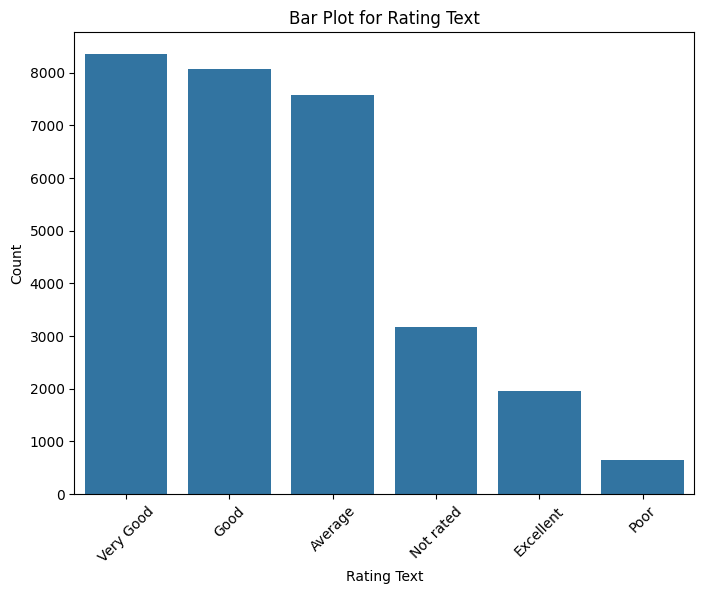

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Bar Plot for Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [36]:
numerical_columns = zomato_df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['Restaurant ID', 'Ratings', 'Average Cost for Two', 'Price Range',
       'Table Booking', 'Online Delivery', 'Delivering now', 'Longitude',
       'Latitude'],
      dtype='object')

In [37]:
ratings_counts = zomato_df['Ratings'].value_counts()
ratings_counts

Ratings
0.0    3164
4.1    2488
4.3    2272
3.6    1981
3.8    1759
3.7    1612
3.9    1509
4.4    1299
4.2    1264
3.2    1255
3.5    1203
3.4    1157
3.3    1071
4.0    1030
3.1     916
3.0     902
2.9     778
4.6     693
2.6     477
2.4     468
2.8     461
4.9     402
4.5     398
2.7     374
4.7     254
4.8     210
2.5     187
2.3      98
2.2      37
2.1      19
2.0      12
1.9       2
1.8       1
Name: count, dtype: int64

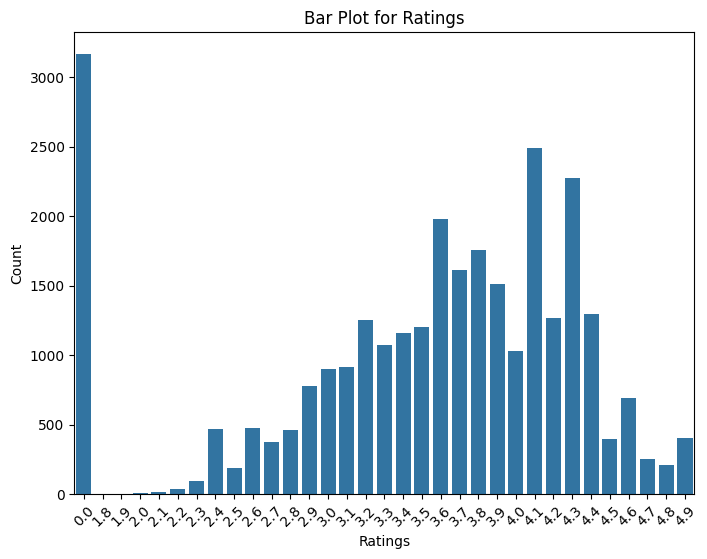

In [38]:
plt.figure(figsize=(8, 6))
sns.barplot(x=ratings_counts.index, y=ratings_counts.values)
plt.title('Bar Plot for Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()

In [39]:
price_counts = zomato_df['Price Range'].value_counts()
price_counts

Price Range
2    10911
1     8234
3     7524
4     3084
Name: count, dtype: int64

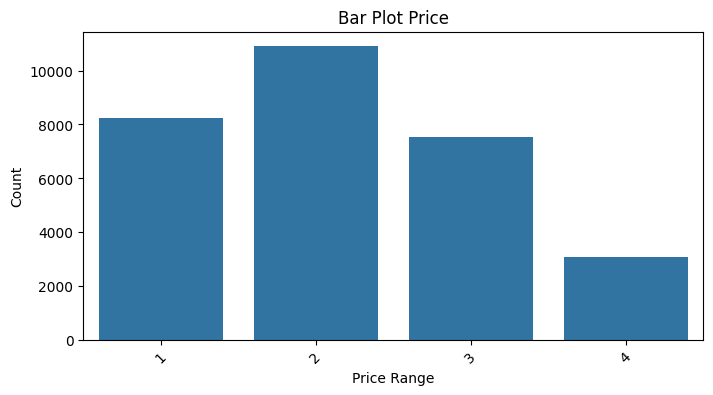

In [40]:
plt.figure(figsize=(8, 4))
sns.barplot(x=price_counts.index, y=price_counts.values)
plt.title('Bar Plot Price')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()